In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
plt.rcParams['figure.dpi'] = 130
style.use('seaborn-v0_8')

In [3]:
def simulateModel(graph_size:int, q:int, p:float, f:float, MCS:int=1000):
    
    opinions = np.ones(graph_size)
    all_nodes = np.arange(0, graph_size)

    nodes = np.random.randint(0, graph_size, size=graph_size*MCS)
    ps = np.random.uniform(size=graph_size*MCS)
    fs = np.random.uniform(size=graph_size*MCS)
    slicer = np.array([0, graph_size])
    
    for i in range(MCS):

        slicer += i * graph_size
        cur_nodes = nodes[slicer[0]:slicer[1]]
        cur_ps = ps[slicer[0]:slicer[1]]
        cur_fs = fs[slicer[0]:slicer[1]]

        for j, node in enumerate(cur_nodes):

            opinion = opinions[node]
            contr_opinion = -1*opinion
            neighbors = np.concatenate((all_nodes[:node], all_nodes[(node+1):]))
            picked_neighbors = np.random.choice(neighbors, replace=False, size=q)
            node_opinions = opinions[picked_neighbors] 

            if (cur_ps[j] < p) and (cur_fs[j] < f):
                opinions[node] = contr_opinion
                
            elif (cur_ps[j] >= p) and (np.count_nonzero(node_opinions==contr_opinion) == q):
                opinions[node] = contr_opinion

    return np.count_nonzero(opinions == 1) / len(opinions)

In [11]:
ps = np.arange(0, 0.7, 0.01)
f1_conc = np.zeros(len(ps))
f2_conc = np.zeros(len(ps))
f3_conc = np.zeros(len(ps))
f4_conc = np.zeros(len(ps))
Nsim = 100

In [12]:
for i, p in enumerate(ps):
    f1 = np.zeros(Nsim)
    f2 = np.zeros(Nsim)
    f3 = np.zeros(Nsim)
    f4 = np.zeros(Nsim)
    for j in range(Nsim):
        f1[j] = simulateModel(100, 4, p, 0.2, 1000)
        f2[j] = simulateModel(100, 4, p, 0.3, 1000)
        f3[j] = simulateModel(100, 4, p, 0.4, 1000)
        f4[j] = simulateModel(100, 4, p, 0.5, 1000)
    f1_conc[i] = np.mean(f1)
    f2_conc[i] = np.mean(f2)
    f3_conc[i] = np.mean(f3)
    f4_conc[i] = np.mean(f4)

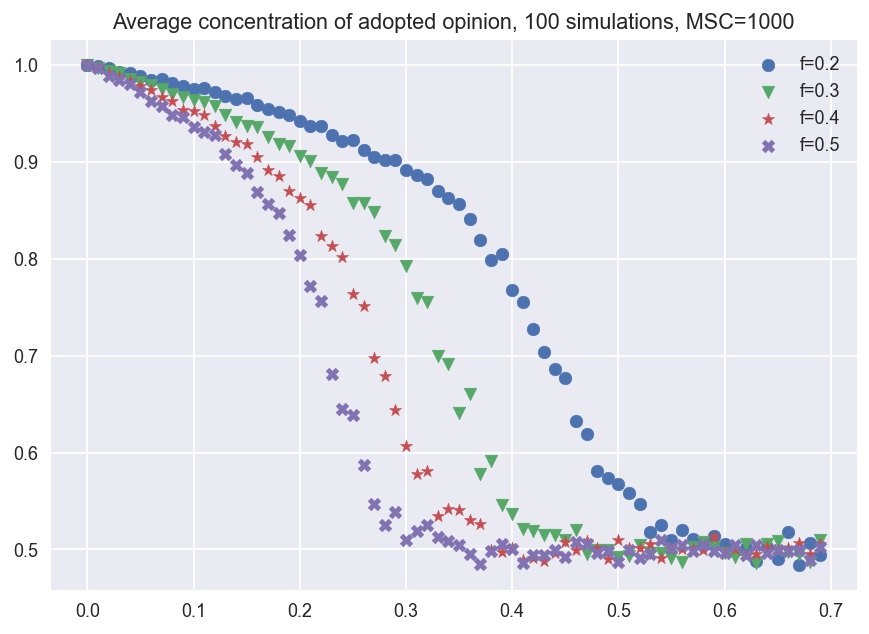

In [13]:
plt.scatter(ps, f1_conc, label='f=0.2', marker='o')
plt.scatter(ps, f2_conc, label='f=0.3', marker='v')
plt.scatter(ps, f3_conc, label='f=0.4', marker='*')
plt.scatter(ps, f4_conc, label='f=0.5', marker='X')
plt.title('Average concentration of adopted opinion, 100 simulations, MSC=1000')
plt.legend()
plt.show()

In [17]:
ps = np.arange(0, 0.7, 0.01)
f1_conc = np.zeros(len(ps))
f2_conc = np.zeros(len(ps))
f3_conc = np.zeros(len(ps))
f4_conc = np.zeros(len(ps))
Nsim = 200

In [18]:
for i, p in enumerate(ps):
    f1 = np.zeros(Nsim)
    f2 = np.zeros(Nsim)
    f3 = np.zeros(Nsim)
    f4 = np.zeros(Nsim)
    for j in range(Nsim):
        f1[j] = simulateModel(100, 4, p, 0.2, 1000)
        f2[j] = simulateModel(100, 4, p, 0.3, 1000)
        f3[j] = simulateModel(100, 4, p, 0.4, 1000)
        f4[j] = simulateModel(100, 4, p, 0.5, 1000)
    f1_conc[i] = np.mean(f1)
    f2_conc[i] = np.mean(f2)
    f3_conc[i] = np.mean(f3)
    f4_conc[i] = np.mean(f4)

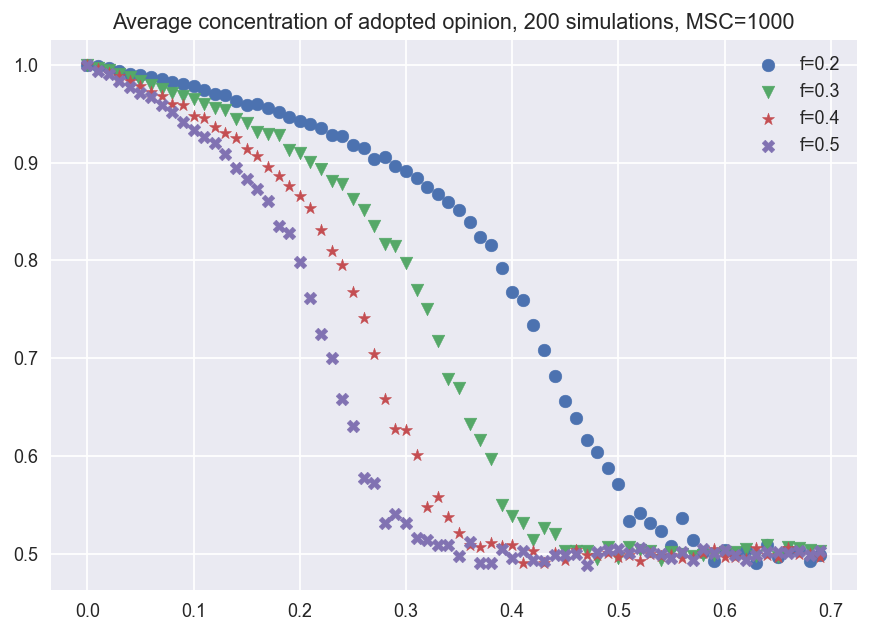

In [19]:
plt.scatter(ps, f1_conc, label='f=0.2', marker='o')
plt.scatter(ps, f2_conc, label='f=0.3', marker='v')
plt.scatter(ps, f3_conc, label='f=0.4', marker='*')
plt.scatter(ps, f4_conc, label='f=0.5', marker='X')
plt.title('Average concentration of adopted opinion, 200 simulations, MSC=1000')
plt.legend()
plt.show()